# 데이터 판별하는 개인 프로젝트

# Importing the libraries

In [ ]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.preprocessing import image
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

import os.path
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from tqdm import tqdm
from time import perf_counter

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from IPython.display import Markdown, display

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dir_ = Path('/content/drive/MyDrive/self_project/train_3')
filepaths = list(dir_.glob(r'**/*.png'))
def proc_img(filepath):
    """
   		이미지데이터의 경로와 label데이터로 데이터프레임 만들기
    """

    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # 경로와 라벨 concatenate
    df = pd.concat([filepath, labels], axis=1)

    # index 재설정
    df = df.sample(frac=1,random_state=0).reset_index(drop = True)

    return df

df = proc_img(filepaths)
df.head(5)

,Filepath,Label
0,/content/drive/MyDrive/self_project/train_3/de...,denudation
1,/content/drive/MyDrive/self_project/train_3/bo...,both
2,/content/drive/MyDrive/self_project/train_3/de...,denudation
3,/content/drive/MyDrive/self_project/train_3/bo...,both
4,/content/drive/MyDrive/self_project/train_3/bo...,both


In [ ]:
# Training/test split
# train_df,test_df = train_test_split(df.sample(frac=0.2), test_size=0.1,random_state=0) #모델링 시간이 오래걸리면 사용
train_df,test_df = train_test_split(df, test_size=0.1,random_state=0)
train_df.shape,test_df.shape

((306, 2), (34, 2))

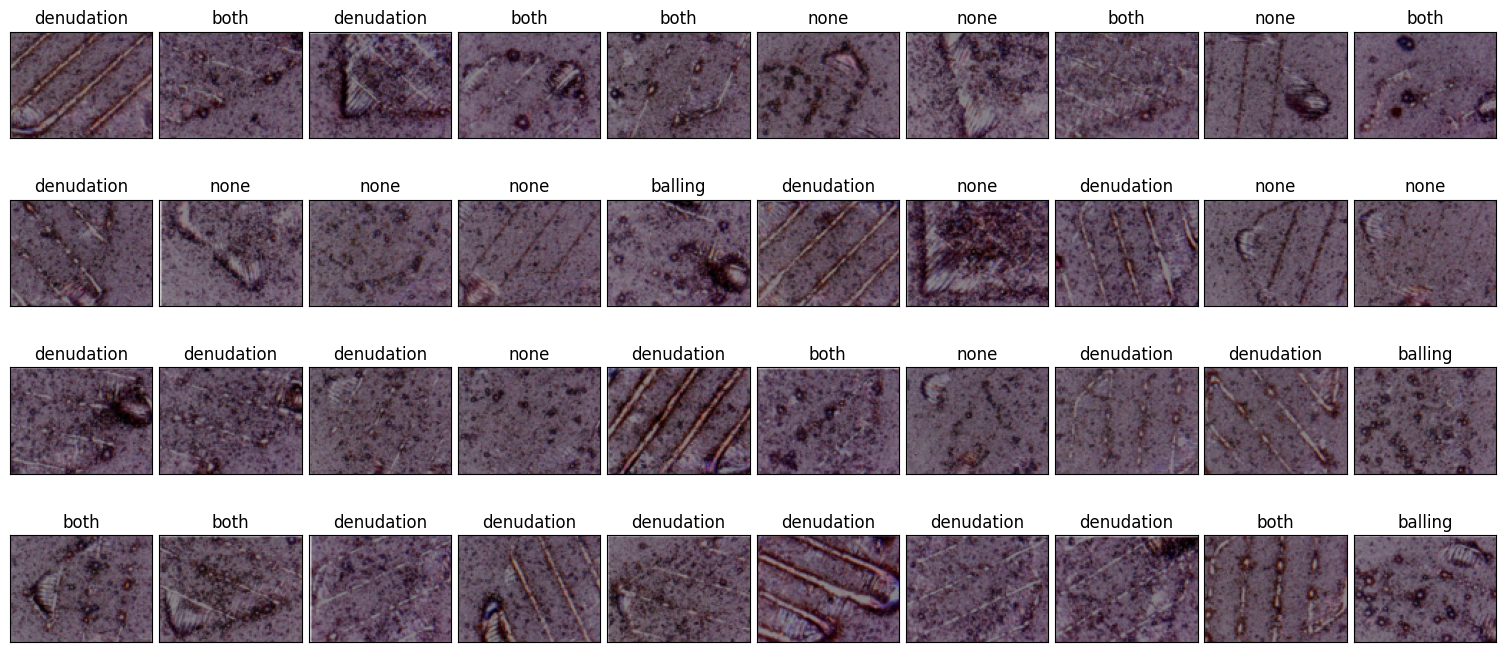

In [ ]:
# 데이터 확인
fig, axes = plt.subplots(nrows=4, ncols=10, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.Filepath[i]))
    ax.set_title(df.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split=0.2)

"""
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip = True
"""

train_gen = train_datagen.flow_from_directory('/content/drive/MyDrive/self_project/train_3',
                                                  target_size = (100, 75),
                                                  batch_size = 5,
                                                  class_mode = 'categorical', subset='training')

test_gen = train_datagen.flow_from_directory('/content/drive/MyDrive/self_project/train_3',
                                              target_size = (100, 75),
                                              batch_size = 5,
                                              class_mode = 'categorical', subset='validation')

Found 273 images belonging to 4 classes.
Found 67 images belonging to 4 classes.


In [ ]:
model = Sequential()

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size = 3,
                                 activation = 'relu',
                                 input_shape = (100, 75, 3)))

model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size = 3,
                                 activation = 'relu'))

model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=4, activation='softmax'))

# Part 3 - Training the CNN

In [ ]:
"""
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
"""

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_102 (Conv2D)         (None, 98, 73, 32)        896       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 49, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_103 (Conv2D)         (None, 47, 34, 32)        9248      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 23, 17, 32)       0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 12512)             0         
                                                                 
 dense_55 (Dense)            (None, 128)              

In [ ]:
model.fit_generator(train_gen, steps_per_epoch = 25, epochs = 50, validation_data = test_gen, validation_steps = 5)

Epoch 1/50


<ipython-input-47-25a4891a916c>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_gen, steps_per_epoch = 25, epochs = 50, validation_data = test_gen, validation_steps = 5)


25/25 [==============================] - 2s 30ms/step - loss: 1.4373 - accuracy: 0.4000 - val_loss: 1.2229 - val_accuracy: 0.5200
Epoch 2/50
25/25 [==============================] - 1s 22ms/step - loss: 1.2582 - accuracy: 0.4000 - val_loss: 1.2156 - val_accuracy: 0.4400
Epoch 3/50
25/25 [==============================] - 1s 23ms/step - loss: 1.2616 - accuracy: 0.4634 - val_loss: 1.2427 - val_accuracy: 0.5200
Epoch 4/50
25/25 [==============================] - 1s 21ms/step - loss: 1.2184 - accuracy: 0.4400 - val_loss: 1.3714 - val_accuracy: 0.3600
Epoch 5/50
25/25 [==============================] - 1s 27ms/step - loss: 1.2470 - accuracy: 0.4960 - val_loss: 1.2039 - val_accuracy: 0.4800
Epoch 6/50
25/25 [==============================] - 1s 27ms/step - loss: 1.2404 - accuracy: 0.4320 - val_loss: 1.4122 - val_accuracy: 0.2000
Epoch 7/50
25/25 [==============================] - 1s 23ms/step - loss: 1.2035 - accuracy: 0.4553 - val_loss: 1.3745 - val_accuracy: 0.1600
Epoch 8/50
25/25 [======

# Part 4 - Making a single prediction

In [ ]:
def create_gen():
    # 생성기 및 데이터 증강으로 이미지 로드
    train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
        validation_split=0.1
    )

    test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
    )

    train_images = train_generator.flow_from_dataframe(
        dataframe=train_df,
        x_col='Filepath', # 파일위치 열이름
        y_col='Label', # 클래스 열이름
        target_size=(224, 224), # 이미지 사이즈
        color_mode='rgb', # 이미지 채널수
        class_mode='categorical', # Y값(Label값)
        batch_size=32,
        shuffle=True, # 데이터를 섞을지 여부
        seed=0,
        subset='training', # train 인지 val인지 설정
        rotation_range=30, # 회전제한 각도 30도
        zoom_range=0.15, # 확대 축소 15%
        width_shift_range=0.2, # 좌우이동 20%
        height_shift_range=0.2, # 상하이동 20%
        shear_range=0.15, # 반시계방햐의 각도
        horizontal_flip=True, # 좌우 반전 True
        fill_mode="nearest"
        # 이미지 변경시 보완 방법 (constant, nearest, reflect, wrap) 4개 존재
    )

    val_images = train_generator.flow_from_dataframe(
        dataframe=train_df,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=True,
        seed=0,
        subset='validation',
        rotation_range=30,
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest"
    )

    test_images = test_generator.flow_from_dataframe(
        dataframe=test_df,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=False
    )

    return train_generator,test_generator,train_images,val_images,test_images

In [ ]:
models = {
    "DenseNet121": {"model":tf.keras.applications.DenseNet121, "perf":0},
    "MobileNetV2": {"model":tf.keras.applications.MobileNetV2, "perf":0},
    "DenseNet201": {"model":tf.keras.applications.DenseNet201, "perf":0},
    "EfficientNetB0": {"model":tf.keras.applications.EfficientNetB0, "perf":0},
    "EfficientNetB1": {"model":tf.keras.applications.EfficientNetB1, "perf":0},
    "InceptionV3": {"model":tf.keras.applications.InceptionV3, "perf":0},
    "MobileNetV2": {"model":tf.keras.applications.MobileNetV2, "perf":0},
    "MobileNetV3Large": {"model":tf.keras.applications.MobileNetV3Large, "perf":0},
    "ResNet152V2": {"model":tf.keras.applications.ResNet152V2, "perf":0},
    "ResNet50": {"model":tf.keras.applications.ResNet50, "perf":0},
    "ResNet50V2": {"model":tf.keras.applications.ResNet50V2, "perf":0},
    "VGG19": {"model":tf.keras.applications.VGG19, "perf":0},
    "VGG16": {"model":tf.keras.applications.VGG16, "perf":0},
    "Xception": {"model":tf.keras.applications.Xception, "perf":0}
}
# Create the generators
train_datagen,test_datagen,train_images,val_images,test_images=create_gen()
print('\n')

def get_model(model):
# Load the pretained model
    kwargs =    {'input_shape':(100, 75, 3),
                'include_top':False,
                'weights':'imagenet',
                'pooling':'avg'}

    pretrained_model = model(**kwargs)
    pretrained_model.trainable = False # 레이어를 동결 시켜서 훈련중 손실을 최소화 한다.

    inputs = pretrained_model.input

    x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
    x = tf.keras.layers.Dense(128, activation='relu')(x)

    outputs = tf.keras.layers.Dense(4, activation='softmax')(x)
    # 라벨 개수가 8개이기 때문에 Dencs도 8로 설정
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Train모델 학습
for name, model in models.items():

    # 전이 학습 모델 가져오기
    m = get_model(model['model'])
    models[name]['model'] = m

    start = perf_counter()

    # 모델 학습
    history = m.fit(train_images,validation_data=val_images,epochs=1,verbose=0)

    # 학습시간과 val_accuracy 저장
    duration = perf_counter() - start
    duration = round(duration,2)
    models[name]['perf'] = duration
    print(f"{name:20} trained in {duration} sec")

    val_acc = history.history['val_accuracy']
    models[name]['val_acc'] = [round(v,4) for v in val_acc]

Found 276 validated image filenames belonging to 4 classes.
Found 30 validated image filenames belonging to 4 classes.
Found 34 validated image filenames belonging to 4 classes.




DenseNet121          trained in 19.59 sec
MobileNetV2          trained in 8.25 sec
DenseNet201          trained in 23.1 sec
EfficientNetB0       trained in 11.87 sec
EfficientNetB1       trained in 15.35 sec


InceptionV3          trained in 12.45 sec
MobileNetV3Large     trained in 7.79 sec
ResNet152V2          trained in 17.97 sec
ResNet50             trained in 13.66 sec
ResNet50V2           trained in 7.37 sec
VGG19                trained in 11.37 sec
VGG16                trained in 3.85 sec
Xception             trained in 9.88 sec


In [ ]:
# test데이터로 모델 성능 예측
for name, model in models.items():

    # Predict the label of the test_images
    pred = models[name]['model'].predict(test_images)
    pred = np.argmax(pred,axis=1)

    # Map the label
    labels = (train_images.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    pred = [labels[k] for k in pred]

    y_test = list(test_df.Label)
    acc = accuracy_score(y_test,pred)
    models[name]['acc'] = round(acc,4)
    print(f'**{name} has a {acc * 100:.2f}% accuracy on the test set**')

# Create a DataFrame with the results
models_result = []

for name, v in models.items():
    models_result.append([ name, models[name]['val_acc'][-1],
                          models[name]['acc'],
                          models[name]['perf']])

df_results = pd.DataFrame(models_result,
                          columns = ['model','val_accuracy','accuracy','Training time (sec)'])
df_results.sort_values(by='accuracy', ascending=False, inplace=True)
df_results.reset_index(inplace=True,drop=True)
df_results

2/2 [==============================] - 5s 1s/step
**DenseNet121 has a 61.76% accuracy on the test set**
2/2 [==============================] - 2s 460ms/step
**MobileNetV2 has a 64.71% accuracy on the test set**
2/2 [==============================] - 4s 1s/step
**DenseNet201 has a 82.35% accuracy on the test set**
2/2 [==============================] - 2s 332ms/step
**EfficientNetB0 has a 47.06% accuracy on the test set**
2/2 [==============================] - 2s 190ms/step
**EfficientNetB1 has a 35.29% accuracy on the test set**
2/2 [==============================] - 3s 1s/step
**InceptionV3 has a 55.88% accuracy on the test set**
2/2 [==============================] - 1s 352ms/step
**MobileNetV3Large has a 47.06% accuracy on the test set**
2/2 [==============================] - 3s 850ms/step
**ResNet152V2 has a 79.41% accuracy on the test set**
2/2 [==============================] - 1s 351ms/step
**ResNet50 has a 47.06% accuracy on the test set**
2/2 [==============================] -

,model,val_accuracy,accuracy,Training time (sec)
0,DenseNet201,0.5333,0.8235,23.10
1,ResNet152V2,0.5000,0.7941,17.97
2,Xception,0.4333,0.7353,9.88
3,ResNet50V2,0.5000,0.7059,7.37
4,VGG16,0.4000,0.7059,3.85
5,VGG19,0.3000,0.6765,11.37
6,MobileNetV2,0.5333,0.6471,8.25
7,DenseNet121,0.7000,0.6176,19.59
8,InceptionV3,0.5333,0.5588,12.45
9,EfficientNetB0,0.4667,0.4706,11.87


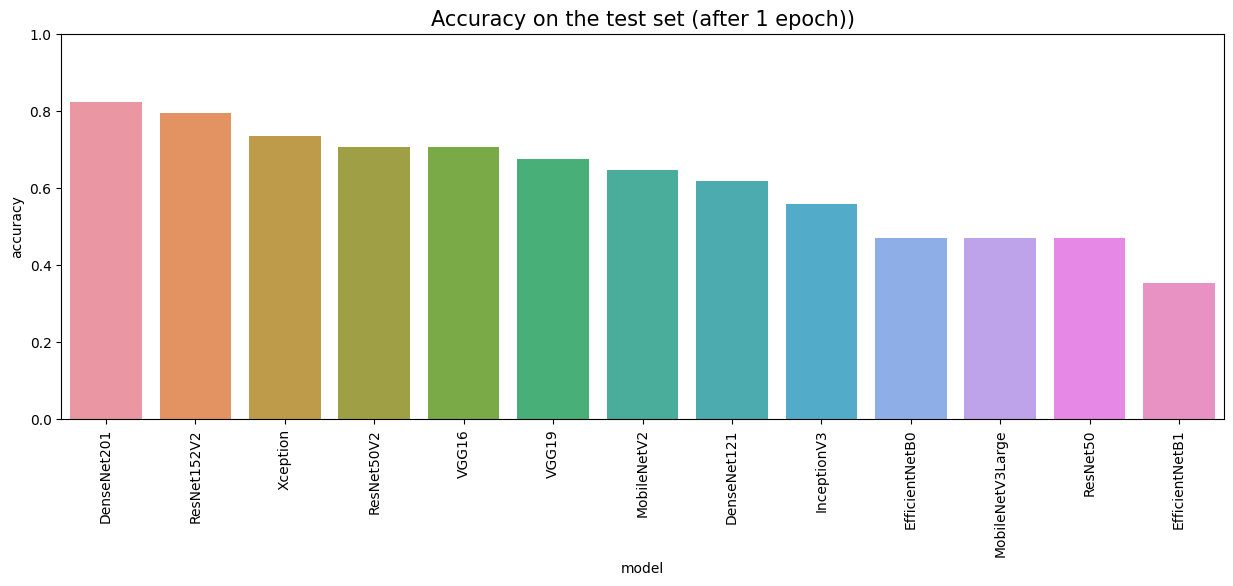

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'model', y = 'accuracy', data = df_results)
plt.title('Accuracy on the test set (after 1 epoch))', fontsize = 15)
plt.ylim(0,1)
plt.xticks(rotation=90)
plt.show()

# Part 5 - Making a single prediction

In [ ]:
#DenseNet201 성능 확인하는 코드

train_df,test_df = train_test_split(df, test_size=0.1, random_state=0)
train_generator,test_generator,train_images,val_images,test_images=create_gen()

model = get_model(tf.keras.applications.DenseNet201)
history = model.fit(train_images,validation_data=val_images,epochs=20)

In [ ]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

def printmd(string):
    # Print with Markdowns
    display(Markdown(string))

y_test = list(test_df.Label)
acc = accuracy_score(y_test,pred)
printmd(f'# Accuracy on the test set: {acc * 100:.2f}%')

2/2 [==============================] - 0s 193ms/step


# Accuracy on the test set: 94.12%

In [ ]:
class_report = classification_report(y_test, pred, zero_division=1)
print(class_report)

              precision    recall  f1-score   support

     balling       0.60      1.00      0.75         6
        both       0.78      0.54      0.64        13
  denudation       0.78      0.88      0.82        16
        none       1.00      0.82      0.90        11

    accuracy                           0.78        46
   macro avg       0.79      0.81      0.78        46
weighted avg       0.81      0.78      0.78        46



In [ ]:
#Resnet152V2 성능 확인하는 코드

train_df,test_df = train_test_split(df, test_size=0.1, random_state=0)
train_generator,test_generator,train_images,val_images,test_images=create_gen()

model = get_model(tf.keras.applications.ResNet152V2)
history = model.fit(train_images,validation_data=val_images,epochs=20)

In [ ]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

def printmd(string):
    # Print with Markdowns
    display(Markdown(string))

y_test = list(test_df.Label)
acc = accuracy_score(y_test,pred)
printmd(f'# Accuracy on the test set: {acc * 100:.2f}%')

2/2 [==============================] - 3s 241ms/step


# Accuracy on the test set: 88.24%

In [ ]:
class_report = classification_report(y_test, pred, zero_division=1)
print(class_report)

              precision    recall  f1-score   support

     balling       0.67      0.67      0.67         3
        both       0.50      0.33      0.40         3
  denudation       0.94      0.94      0.94        16
        none       0.92      1.00      0.96        12

    accuracy                           0.88        34
   macro avg       0.76      0.73      0.74        34
weighted avg       0.87      0.88      0.87        34



In [ ]:
print("--predict--")
output = model.predict_generator(test_gen, steps = 5)
np.set_printoptions(formatter = {'float' : lambda x : "{0:0.3f}".format(x)})
print(test_gen.class_indices)
print(output)

--predict--


<ipython-input-66-cba3d5405c52>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  output = model.predict_generator(test_gen, steps = 5)


{'balling': 0, 'both': 1, 'denudation': 2, 'none': 3}
[[0.000 0.002 0.865 0.133]
 [0.013 0.086 0.035 0.866]
 [0.005 0.391 0.186 0.419]
 [0.000 0.003 0.003 0.993]
 [0.005 0.556 0.039 0.401]
 [0.003 0.021 0.070 0.907]
 [0.002 0.036 0.005 0.957]
 [0.001 0.185 0.105 0.709]
 [0.011 0.305 0.161 0.523]
 [0.011 0.035 0.036 0.918]
 [0.006 0.428 0.238 0.327]
 [0.022 0.150 0.147 0.680]
 [0.013 0.021 0.009 0.957]
 [0.005 0.124 0.346 0.525]
 [0.000 0.001 0.001 0.999]
 [0.202 0.128 0.102 0.568]
 [0.000 0.000 1.000 0.000]
 [0.002 0.217 0.019 0.761]
 [0.001 0.013 0.026 0.960]
 [0.054 0.115 0.130 0.701]
 [0.189 0.305 0.126 0.380]
 [0.014 0.065 0.043 0.877]
 [0.009 0.004 0.002 0.985]
 [0.046 0.017 0.020 0.917]
 [0.004 0.008 0.035 0.953]]
